# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [ ]:
import numpy as np

In [ ]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs =[]

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t)+np.dot(U, state_t)+b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 104s 621ms/step - loss: 0.5887 - acc: 0.6791 - val_loss: 0.4589 - val_acc: 0.7942
Epoch 2/10
157/157 [==============================] - 101s 645ms/step - loss: 0.3799 - acc: 0.8384 - val_loss: 0.4063 - val_acc: 0.8192
Epoch 3/10
157/157 [==============================] - 109s 694ms/step - loss: 0.2942 - acc: 0.8838 - val_loss: 0.3778 - val_acc: 0.8326
Epoch 4/10
157/157 [==============================] - 110s 704ms/step - loss: 0.2456 - acc: 0.9071 - val_loss: 0.3903 - val_acc: 0.8294
Epoch 5/10
157/157 [==============================] - 93s 589ms/step - loss: 0.2040 - acc: 0.9244 - val_loss: 0.4172 - val_acc: 0.8422
Epoch 6/10
157/157 [==============================] - 94s 600ms/step - loss: 0.1623 - acc: 0.9425 - val_loss: 0.3867 - val_acc: 0.8696
Epoch 7/10
157/157 [==============================] - 84s 534ms/step - loss: 0.1264 - acc: 0.9545 - val_loss: 0.4407 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================]

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-20-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


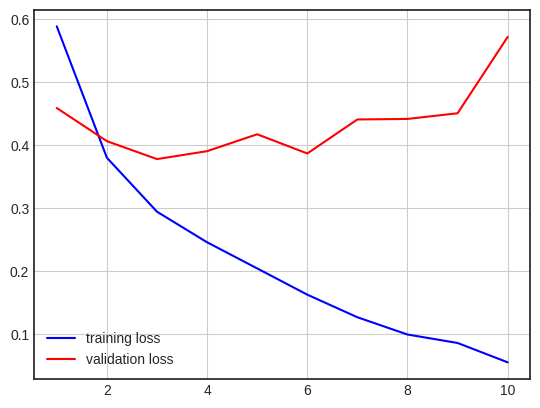

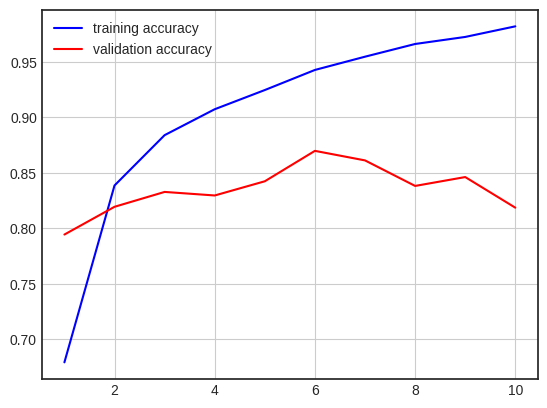

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, color='blue', label='training loss')
plt.plot(epochs, val_loss, color='red', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, color='blue', label='training accuracy')
plt.plot(epochs, val_acc, color='red', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 34s 44ms/step - loss: 0.5675 - acc: 0.8219


[0.5674631595611572, 0.8219199776649475]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 500

In [ ]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

(8982, 500)
(2246, 500)


In [ ]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 64s 258ms/step - loss: 2.5546 - acc: 0.3517 - val_loss: 2.4066 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 40s 178ms/step - loss: 2.3771 - acc: 0.3587 - val_loss: 2.1071 - val_acc: 0.4341
Epoch 3/20
225/225 [==============================] - 29s 128ms/step - loss: 1.9082 - acc: 0.5069 - val_loss: 1.7761 - val_acc: 0.5353
Epoch 4/20
225/225 [==============================] - 27s 120ms/step - loss: 1.7356 - acc: 0.5475 - val_loss: 2.0461 - val_acc: 0.4385
Epoch 5/20
225/225 [==============================] - 19s 83ms/step - loss: 1.7221 - acc: 0.5517 - val_loss: 1.6986 - val_acc: 0.5615
Epoch 6/20
225/225 [==============================] - 18s 79ms/step - loss: 1.6443 - acc: 0.5635 - val_loss: 1.7406 - val_acc: 0.5376
Epoch 7/20
225/225 [==============================] - 14s 63ms/step - loss: 1.5473 - acc: 0.5954 - val_loss: 1.5856 - val_acc: 0.5893
Epoch 8/20
225/225 [==============================] - 13s 

### 시각화

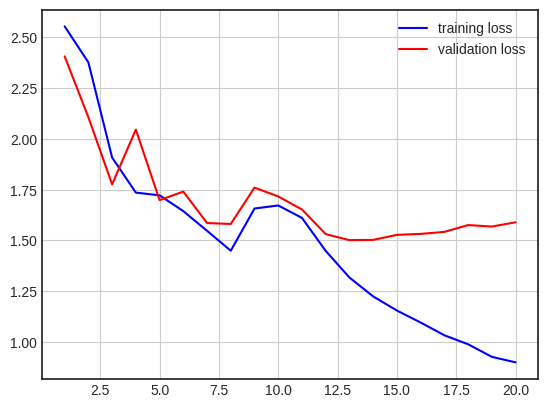

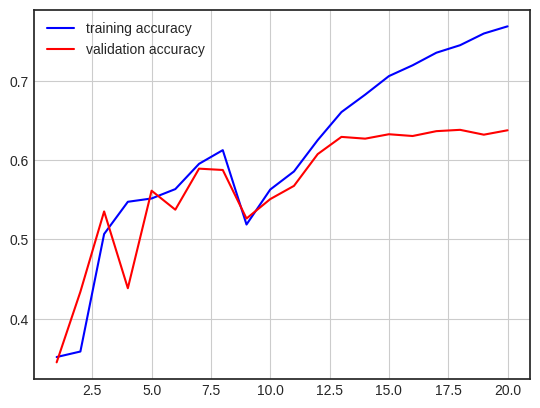

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, color='blue', label='training loss')
plt.plot(epochs, val_loss, color='red', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, color='blue', label='training accuracy')
plt.plot(epochs, val_acc, color='red', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 17ms/step - loss: 1.6837 - acc: 0.6140


[1.6836957931518555, 0.6139804124832153]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1177 - acc: 0.9599 - val_loss: 0.5517 - val_acc: 0.8646
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1107 - acc: 0.9633 - val_loss: 0.3867 - val_acc: 0.8738
Epoch 3/10
157/157 [==============================] - 6s 40ms/step - loss: 0.1012 - acc: 0.9646 - val_loss: 0.3499 - val_acc: 0.8684
Epoch 4/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0929 - acc: 0.9707 - val_loss: 0.4159 - val_acc: 0.8650
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.0877 - acc: 0.9729 - val_loss: 0.3795 - val_acc: 0.8674
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.0834 - acc: 0.9721 - val_loss: 0.4317 - val_acc: 0.8668
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0741 - acc: 0.9756 - val_loss: 0.5126 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================] - 4s 28ms/step - 

### 시각화

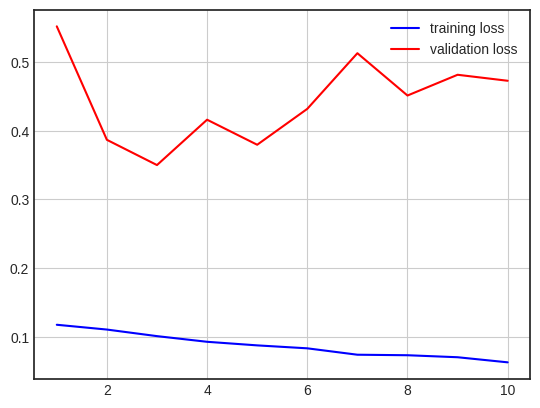

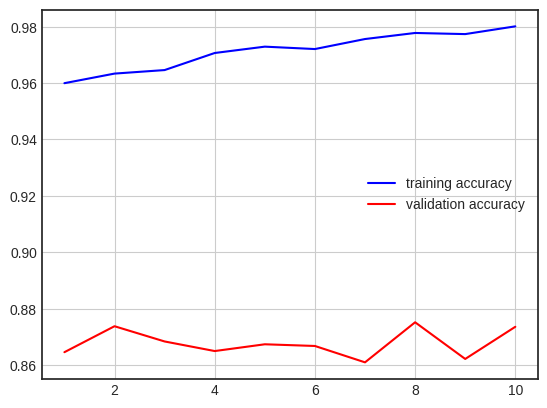

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, color='blue', label='training loss')
plt.plot(epochs, val_loss, color='red', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, color='blue', label='training accuracy')
plt.plot(epochs, val_acc, color='red', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.5302 - acc: 0.8606


[0.5302474498748779, 0.8605999946594238]

# Cosine 함수를 이용한 순환 신경망

In [ ]:
import numpy as np

In [45]:
np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time % 30) /30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time)+np.random.random(361))

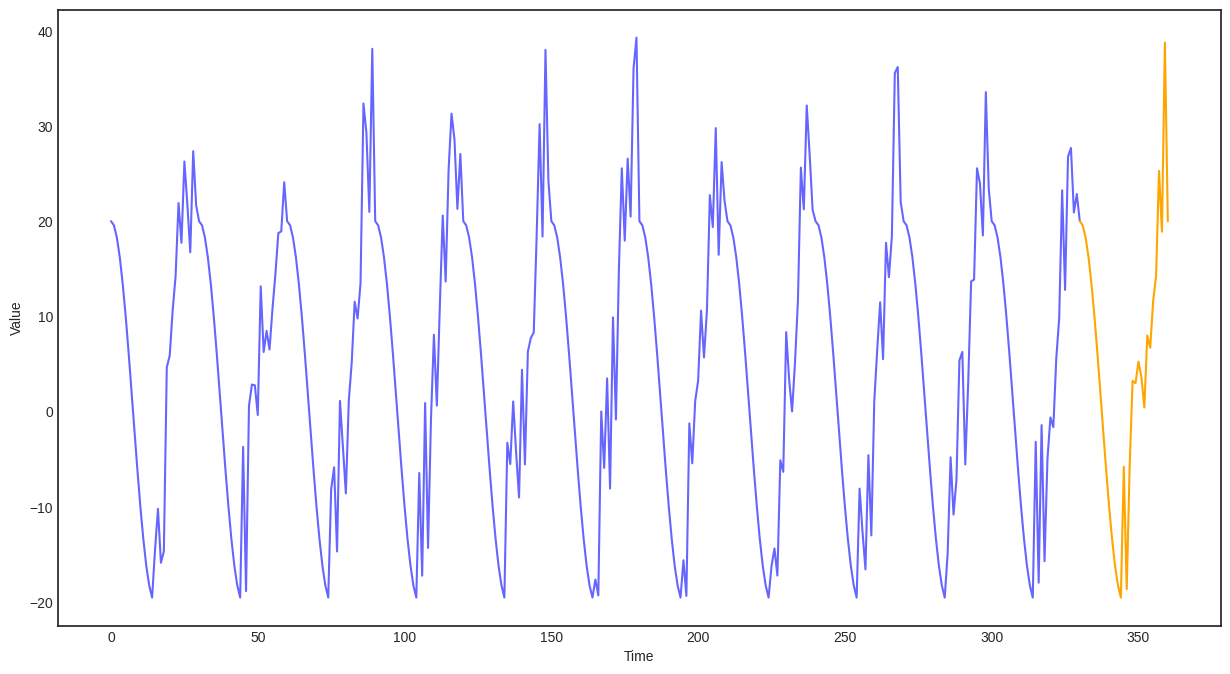

In [48]:
plt.figure(figsize=(15,8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color='blue', alpha=0.6, label='Train Data')
plt.plot(np.arange(30*11, 30*12+1),
         time_series[30*11:],
         color='orange', label='Test Data')

### 데이터 전처리

In [49]:
def make_data(time_series, n):
  x_train_full, y_train_full = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n) < len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else:
      break

  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

  return x_train_full, y_train_full

In [50]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [51]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [52]:
x_train_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1, 1)

In [53]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [54]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [55]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [56]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [57]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [58]:
def build_model(n):
  model = Sequential()

  model.add(SimpleRNN(units=32, activation='tanh', input_shape=(n,1)))
  model.add(Dense(1))

  model.compile(loss='mse',
              optimizer='adam')
  
  return model

In [59]:
model = build_model(10)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [61]:
model.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 2s 9ms/step - loss: 200.6974
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 172.6987
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 152.2512
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 133.6790
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 119.3528
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 107.2392
Epoch 7/100
28/28 [==============================] - 0s 10ms/step - loss: 98.5253
Epoch 8/100
28/28 [==============================] - 0s 16ms/step - loss: 91.4239
Epoch 9/100
28/28 [==============================] - 0s 18ms/step - loss: 85.1406
Epoch 10/100
28/28 [==============================] - 1s 18ms/step - loss: 79.6368
Epoch 11/100
28/28 [==============================] - 0s 17ms/step - loss: 74.6380
Epoch 12/100
28/28 [==============================] - 0s 17ms/step - loss: 70.1023
Epoch 13/

## 예측값 그려보기

1/1 [==============================] - 0s 23ms/step


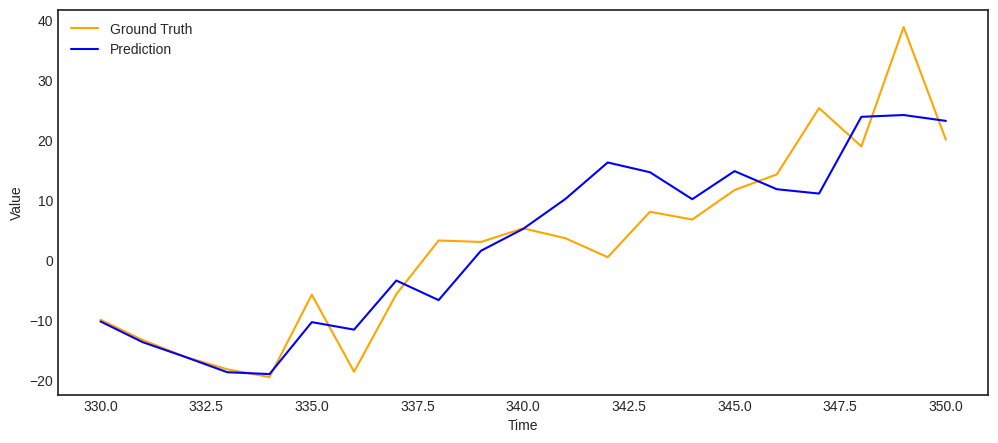

In [63]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+len(prediction))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label = 'Ground Truth' )
plt.plot(pred_range, prediction.flatten(), color='blue', label = 'Prediction' )
plt.legend()
plt.show()

## 모델 재구성 (2)
- LSTM 사용

In [70]:
from tensorflow.keras.layers import LSTM

In [75]:
def build_model2(n):
  model = Sequential()

  # model.add(LSTM(units=64, activation='tanh', input_shape=(n,1)))
  model.add(LSTM(units=64, return_sequence=True, input_shape=(n,1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(loss='mse',
                optimizer='adam')
  
  return model

In [76]:
model_2 = build_model2(10)
model_2.summary()

TypeError: ignored

## 모델 재학습 및 예측값 그려보기

In [77]:
model_2.fit(x_train, y_train, epochs=100, 
                    batch_size=12)

NameError: ignored

In [ ]:
prediction2 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+len(prediction2))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label = 'Ground Truth' )
plt.plot(pred_range, prediction.flatten(), color='red', label = 'Model1 Prediction' )
plt.plot(pred_range, prediction2.flatten(), color='blue', label = 'Model2 Prediction' )
plt.legend()
plt.show()

## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [ ]:
from tensorflow.keras.layers import GRU

In [78]:
def build_model3(n):
  model = Sequential()

  # model.add(LSTM(units=64, activation='tanh', input_shape=(n,1)))
  model.add(GRU(units=30, return_sequence=True, input_shape=(n,1)))
  model.add(GRU(30))
  model.add(Dense(1))

  model.compile(loss='mse',
                optimizer='adam')
  
  return model

model_3 = build_model3(10)
model_3.summary()  

NameError: ignored

In [78]:
model_3.fit(x_train, y_train, epochs=100, 
                    batch_size=12)

In [ ]:
prediction3 = model_3.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+len(prediction3))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label = 'Ground Truth' )
plt.plot(pred_range, prediction.flatten(), color='red', label = 'Model1 Prediction' )
plt.plot(pred_range, prediction3.flatten(), color='blue', label = 'Model3 Prediction' )
plt.legend()
plt.show()

## 모델 재학습 및 예측값 그려보기

# Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

### 모델 구성

### 모델 학습

### 시각화

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음